In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.preprocessing import StandardScaler




import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the datasets
df = pd.read_csv('data/clean_train.csv')

In [3]:
df.head()

,Unnamed: 0,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,status_group
0,0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,1999,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,2009,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,1986,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
4,4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

# Visuals

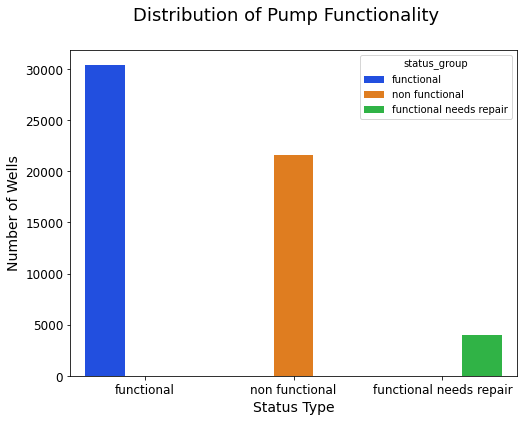

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='status_group', hue="status_group", palette='bright')

fig.suptitle('Distribution of Pump Functionality', fontsize=18)
plt.xlabel("Status Type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()


In [6]:
df['status_group'].value_counts()

functional                 30381
non functional             21576
functional needs repair     4016
Name: status_group, dtype: int64

## Construction Year

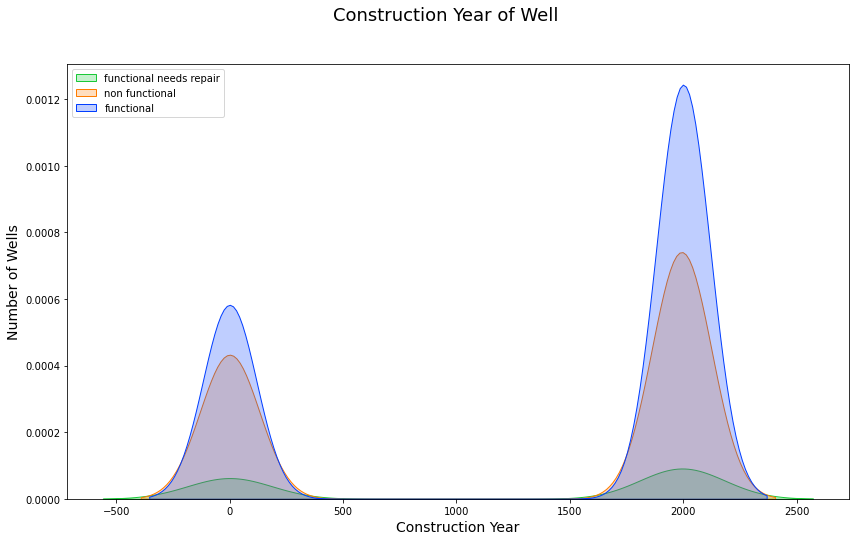

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Well', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

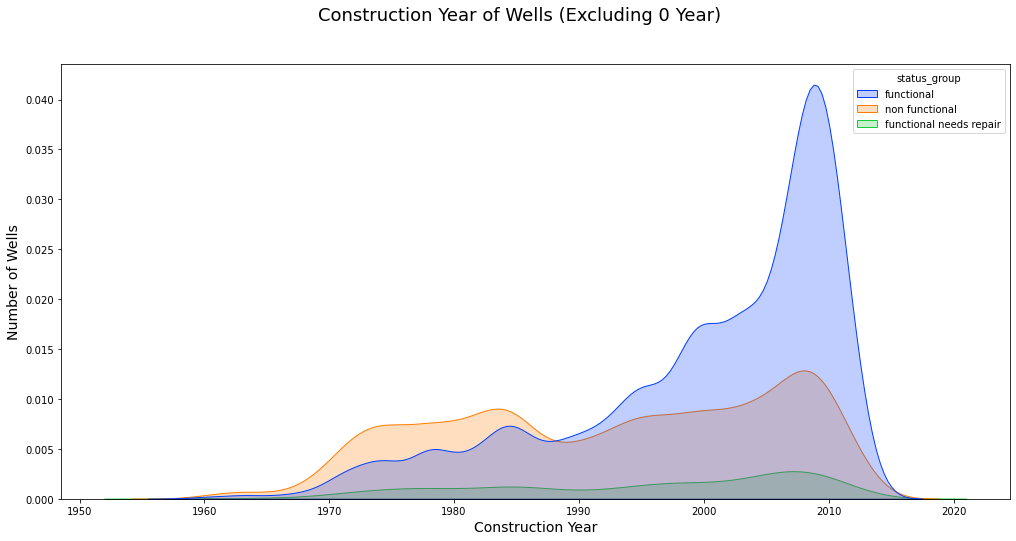

In [8]:
#Select wells without 'construction_year' = 0
df_actual_construction_years = df.loc[df['construction_year'] != 0]

fig, ax = plt.subplots(figsize=(17,8))
ax = sns.kdeplot(data=df_actual_construction_years, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Wells (Excluding 0 Year)', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
#plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

In [9]:
#Create dataset with only construction_year and status_group
years_status = df_actual_construction_years[['construction_year', 'status_group']]

#Dummy the status_group
years_status_dum = pd.get_dummies(years_status, columns=['status_group'])

#Group the sum of the status group dummies by construction year 
year_max = years_status_dum.groupby('construction_year').sum()

#select 5 year intervals 
year_stat_5intervals = year_max.iloc[::5, :]
year_stat_5intervals

,status_group_functional,status_group_functional needs repair,status_group_non functional
construction_year,,,
1960,20.0,4.0,21.0
1965,11.0,1.0,7.0
1970,85.0,15.0,210.0
1975,144.0,41.0,252.0
1980,232.0,47.0,368.0
1985,324.0,83.0,536.0
1990,342.0,37.0,288.0
1995,580.0,70.0,328.0
2000,936.0,78.0,552.0


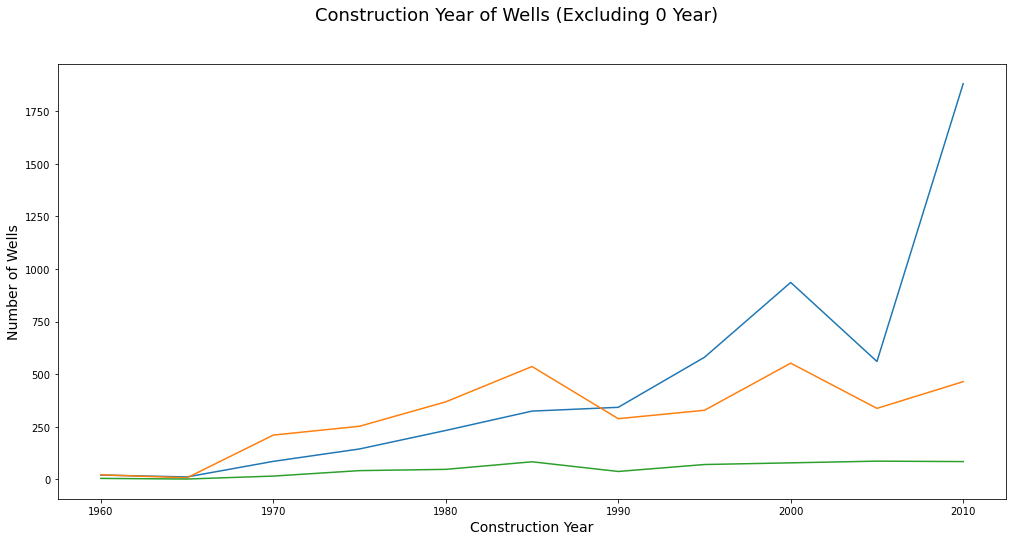

In [10]:
fig, ax = plt.subplots(figsize=(17,8))
ax = sns.lineplot(data=year_stat_5intervals, x='construction_year', y='status_group_functional', palette='bright')

ax = sns.lineplot(data=year_stat_5intervals, x='construction_year', y='status_group_non functional', palette='bright')

ax = sns.lineplot(data=year_stat_5intervals, x='construction_year', y='status_group_functional needs repair', palette='bright')

fig.suptitle('Construction Year of Wells (Excluding 0 Year)', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
#plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

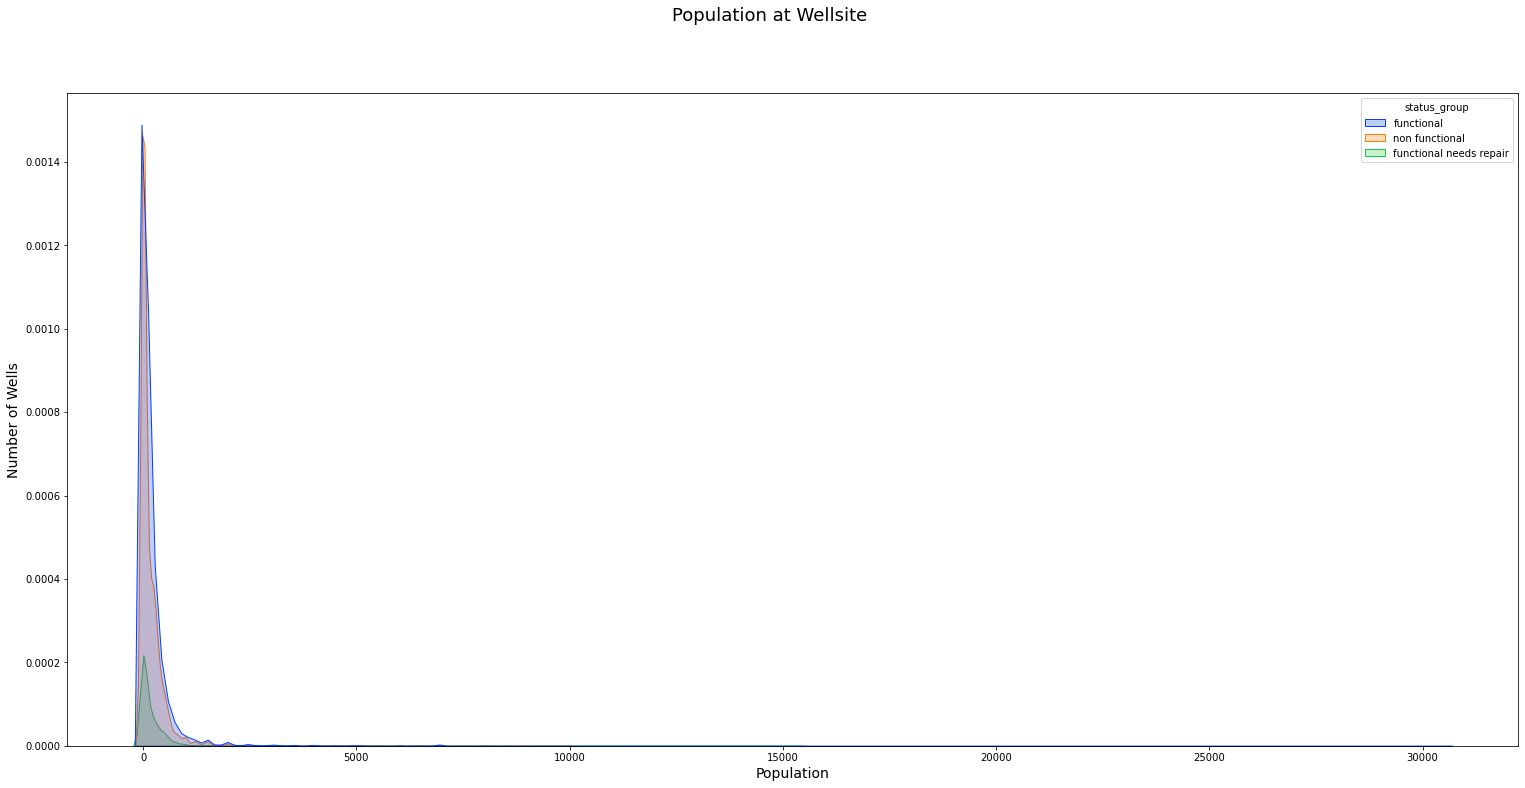

In [11]:
fig, ax = plt.subplots(figsize=(26,12))
ax = sns.kdeplot(data=df, x='population', hue='status_group', palette='bright', fill=True)
fig.suptitle('Population at Wellsite', fontsize=18)
plt.xlabel("Population", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [12]:
#Drop the rows where population is 0
pop_none0 = df.loc[df['population'] != 0]
pop_none0.describe()

,Unnamed: 0,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000
mean,29714.279630,37123.497255,452.162244,947.633354,36.111405,-6.262265,16.348539,6.514503,280.864123,1960.823221
std,17163.488698,21394.653114,3264.605949,617.007697,2.638423,2.741978,22.094061,11.562476,555.933857,266.364506
min,0.000000,1.000000,0.000000,-90.000000,29.607122,-11.649440,2.000000,1.000000,1.000000,0.000000
25%,14874.500000,18553.500000,0.000000,331.000000,34.718816,-8.633876,4.000000,2.000000,40.250000,1986.000000
50%,29719.500000,37134.500000,0.000000,1084.000000,36.802988,-6.176175,10.000000,3.000000,150.000000,2000.000000
75%,44570.750000,55495.500000,200.000000,1442.000000,38.069305,-3.662432,16.000000,5.000000,324.000000,2008.000000
max,59399.000000,74247.000000,250000.000000,2770.000000,40.345193,-1.042375,99.000000,67.000000,30500.000000,2013.000000


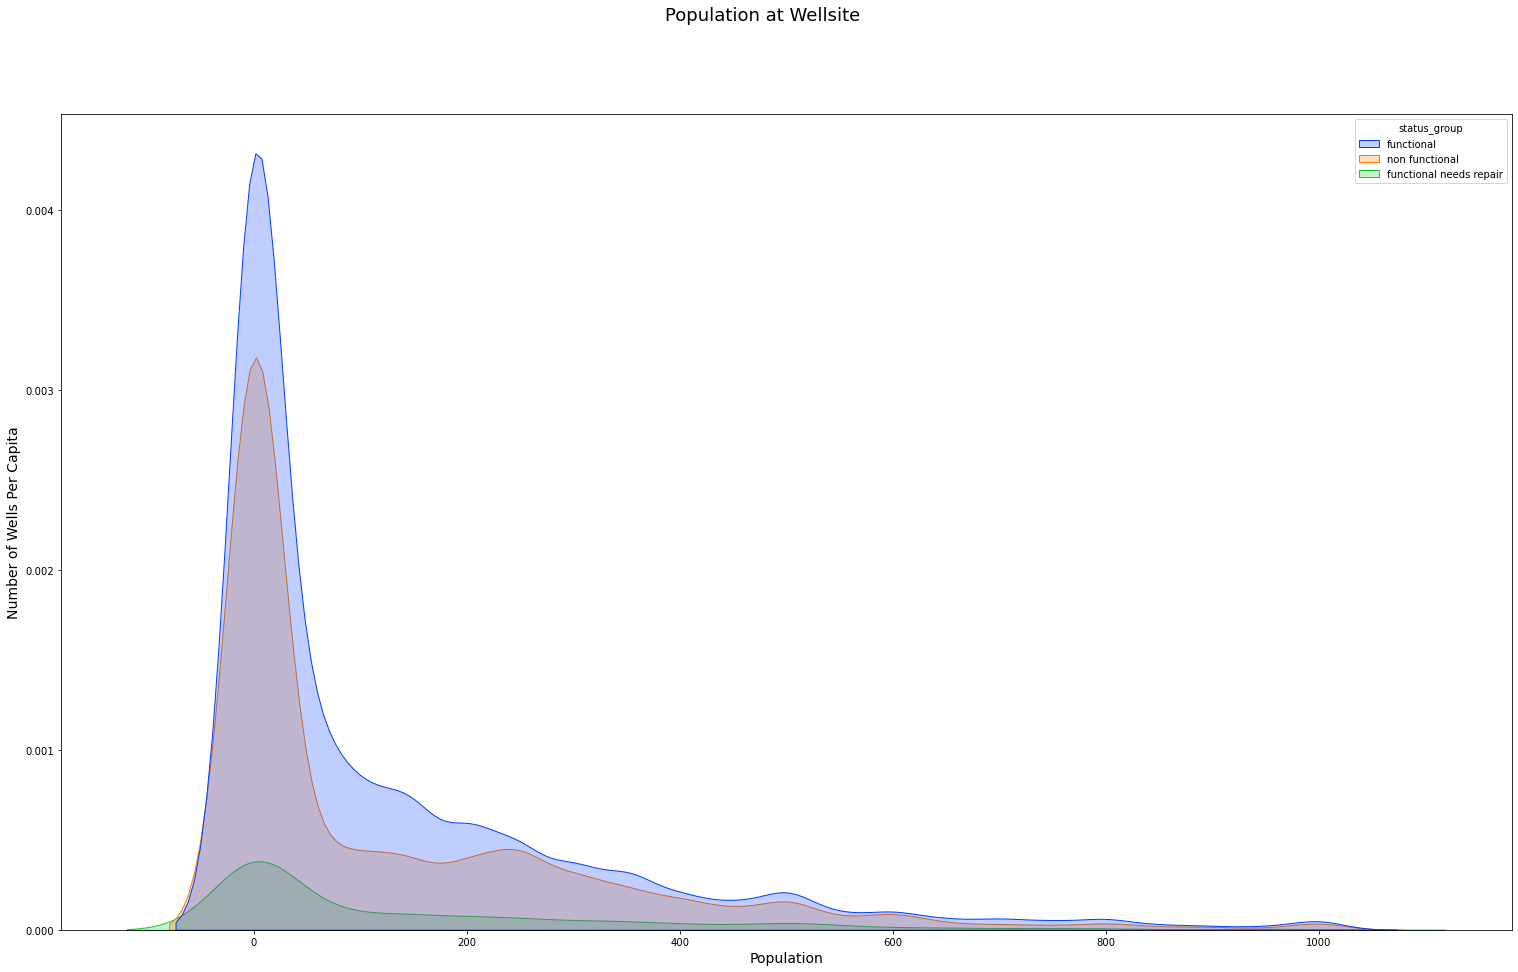

In [45]:
# Get a closer look
pop_df = df.loc[df['population'] <= 1000]

fig, ax = plt.subplots(figsize=(26,15))
ax = sns.kdeplot(data=pop_df, x='population', hue='status_group', palette='bright', fill=True)
fig.suptitle('Population at Wellsite', fontsize=18)
plt.xlabel("Population", fontsize=14)
plt.ylabel("Number of Wells Per Capita", fontsize=14)
plt.show()

In [14]:
#Create dataset with only population and status_group
pop_status = df[['population', 'status_group']]

pop_status_1000= pop_status.loc[pop_status['population'] <= 1000]


#Dummy the status_group
pop_status_dum = pd.get_dummies(pop_status_1000, columns=['status_group'])

#Group the sum of the status group dummies by population
popmax = pop_status_dum.groupby('population').sum()

#select 5 year intervals 
pop_stat_5intervals = popmax.iloc[::50, :]
pop_stat_5intervals

,status_group_functional,status_group_functional needs repair,status_group_non functional
population,,,
0,10393.0,1613.0,7905.0
50,721.0,67.0,326.0
100,668.0,61.0,384.0
151,1.0,0.0,1.0
203,14.0,2.0,6.0
253,11.0,1.0,15.0
304,3.0,0.0,1.0
357,4.0,0.0,1.0
422,0.0,1.0,0.0


In [41]:
poppy = pop_status.value_counts()
poppy

population  status_group           
0           functional                 10393
            non functional              7905
1           non functional              3200
            functional                  2645
0           functional needs repair     1613
                                       ...  
595         non functional                 1
596         functional                     1
            non functional                 1
598         functional needs repair        1
433         non functional                 1
Length: 1896, dtype: int64

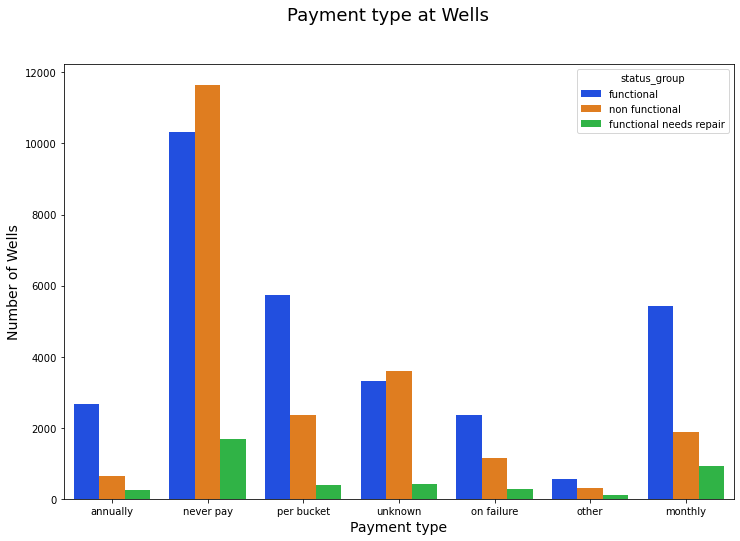

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(data=df, x='payment_type', hue="status_group", palette='bright')

fig.suptitle('Payment type at Wells', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [16]:
df['North_South'] = np.where(df['latitude'] >= -5.1, 'North', 'South')

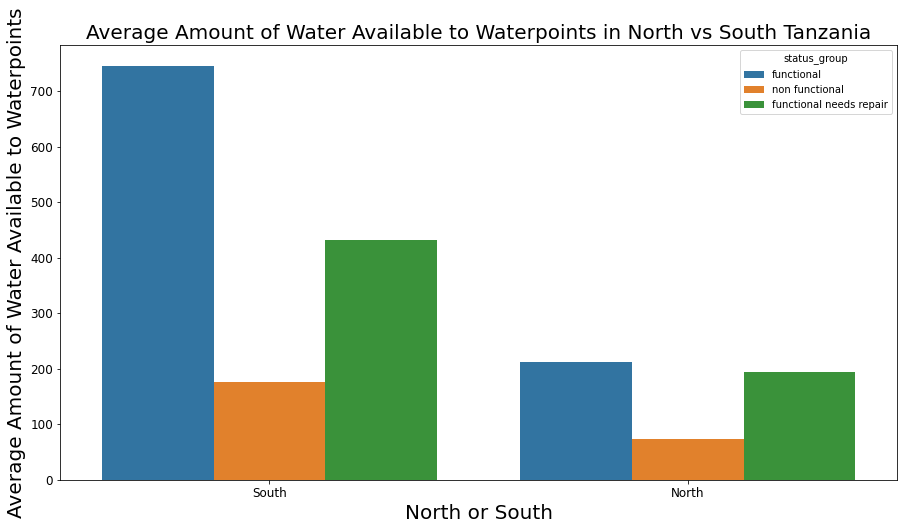

In [17]:
fig, ax = plt.subplots(figsize = (15 , 8))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(data=df, x='North_South', y='amount_tsh', hue="status_group", ci = None)
ax.set_xlabel('North or South', fontsize = 20)
ax.set_ylabel('Average Amount of Water Available to Waterpoints', fontsize = 20)
ax.set_title('Average Amount of Water Available to Waterpoints in North vs South Tanzania', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

In [18]:
df.drop('Unnamed: 0', axis=1, inplace=True)

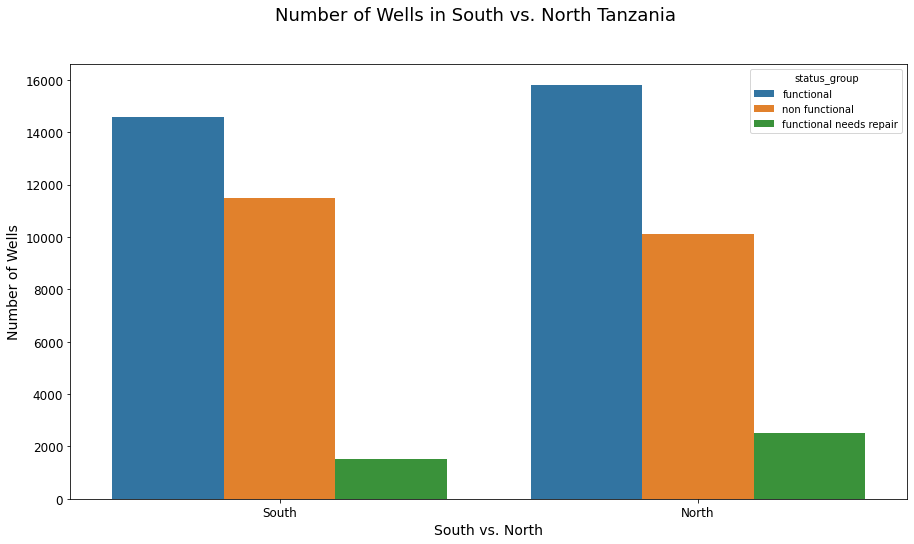

In [19]:
fig, ax = plt.subplots(figsize = (15 , 8))
ax = sns.countplot(x='North_South', hue="status_group", data=df)

fig.suptitle('Number of Wells in South vs. North Tanzania', fontsize=18)
plt.xlabel('South vs. North', fontsize=14)
plt.ylabel('Number of Wells', fontsize=14)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

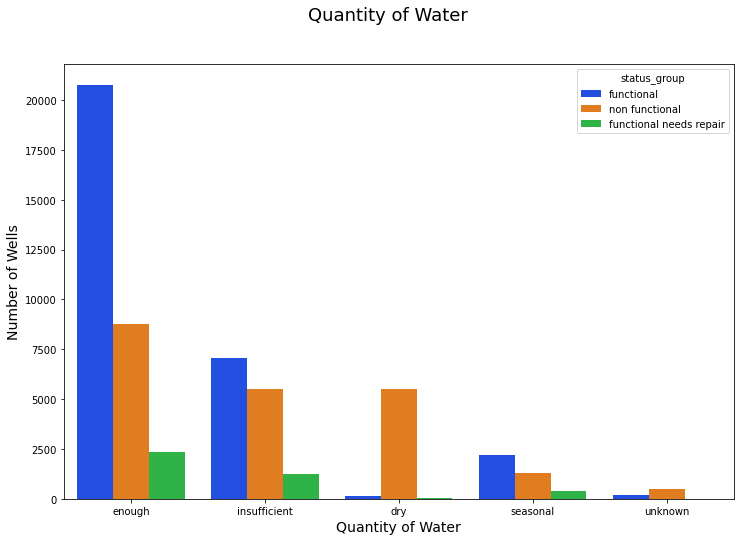

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(data=df, x='quantity', hue="status_group", palette='bright')

fig.suptitle('Quantity of Water', fontsize=18)
plt.xlabel("Quantity of Water", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [21]:
#fig, ax = plt.subplots(figsize=(12,8))
#ax = sns.countplot(x='gps_height', hue="status_group", palette='bright', data=df)
#
#fig.suptitle('gps_height of Water', fontsize=18)
#plt.xlabel("gps_height of Water", fontsize=14)
#plt.ylabel("Number of Wells", fontsize=14)
#plt.show()

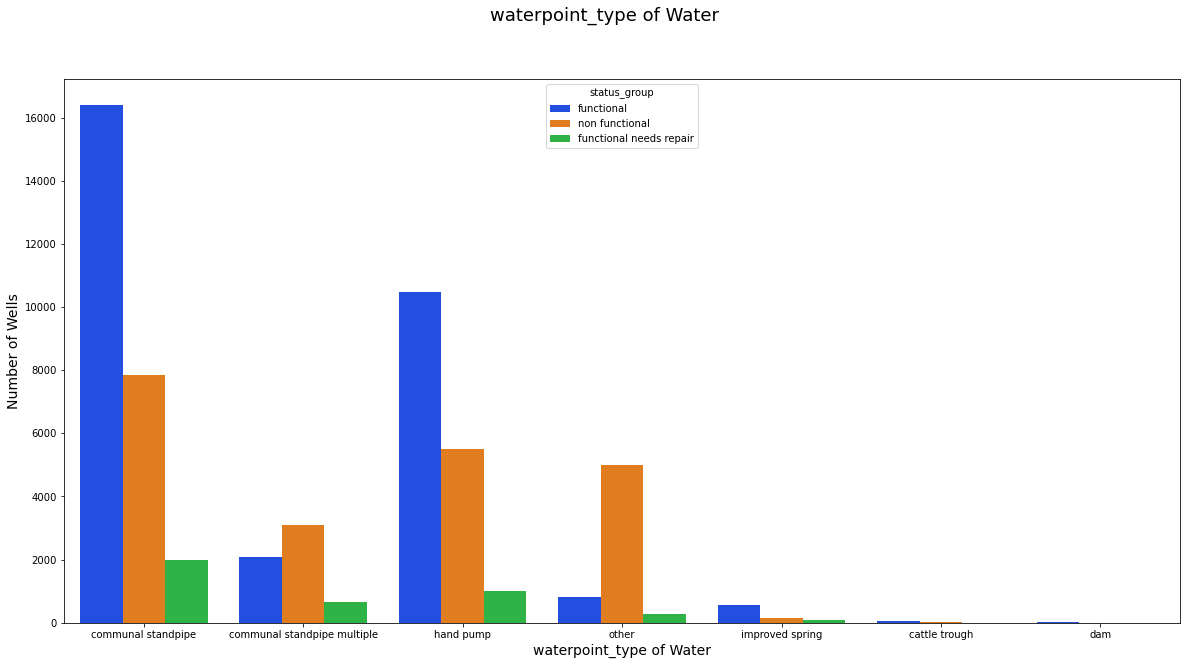

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='waterpoint_type', hue="status_group", palette='bright')

fig.suptitle('waterpoint_type of Water', fontsize=18)
plt.xlabel("waterpoint_type of Water", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

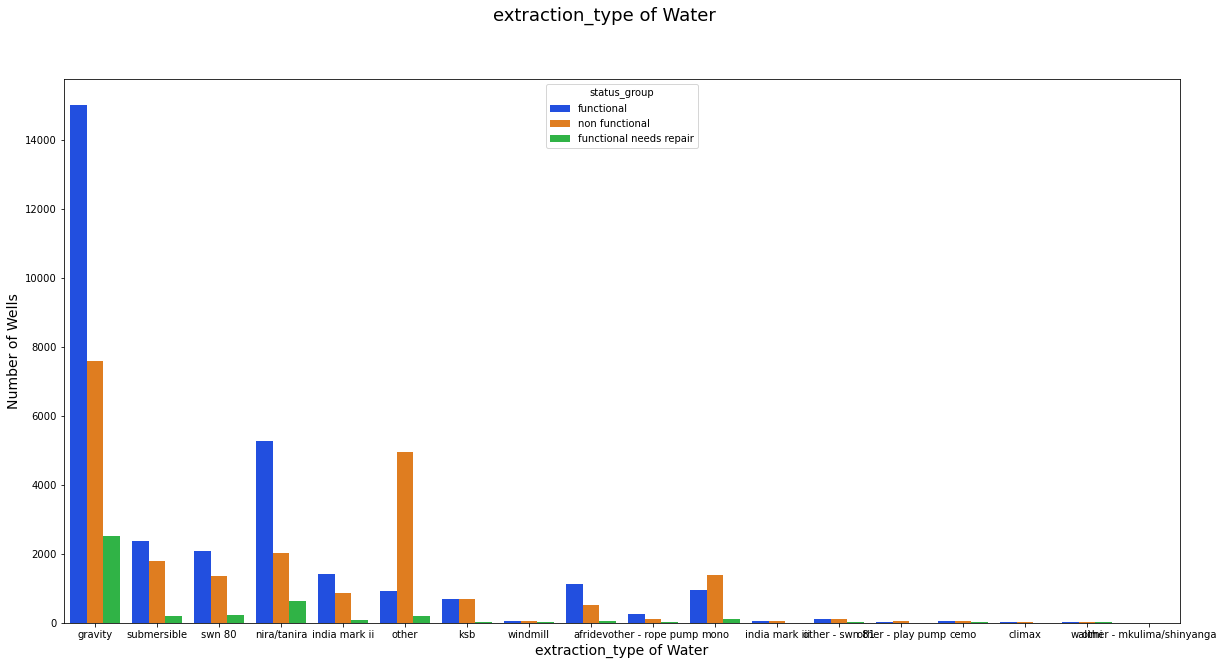

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='extraction_type', hue="status_group", palette='bright')

fig.suptitle('extraction_type of Water', fontsize=18)
plt.xlabel("extraction_type of Water", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

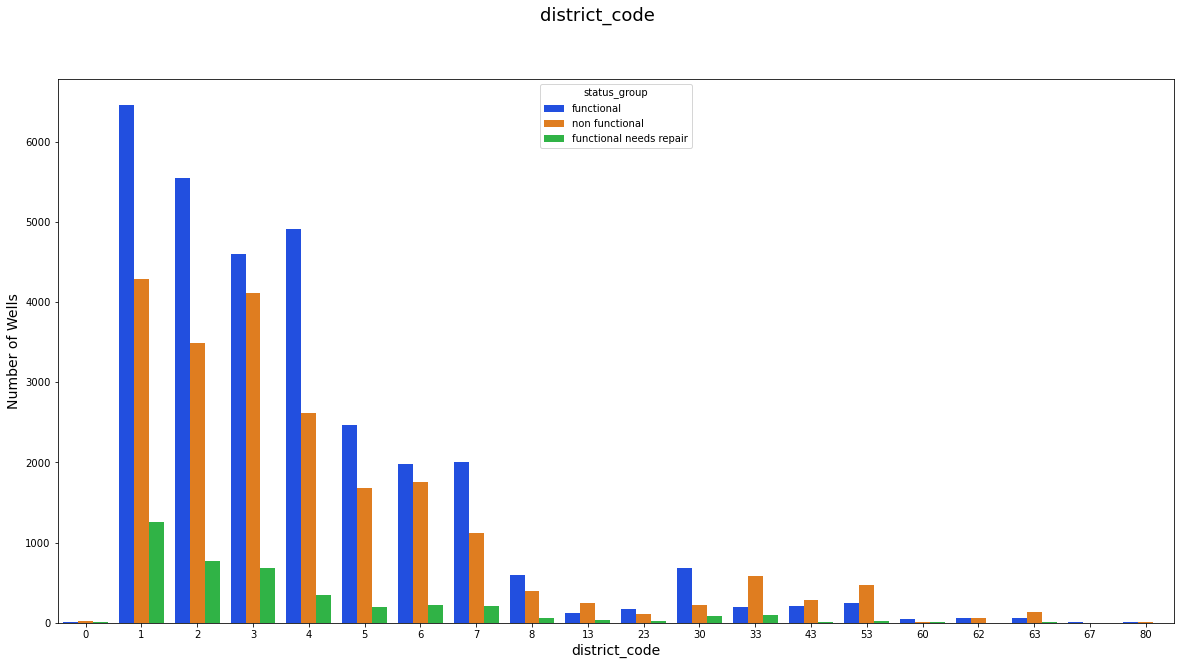

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='district_code', hue="status_group", palette='bright')

fig.suptitle('district_code', fontsize=18)
plt.xlabel("district_code", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

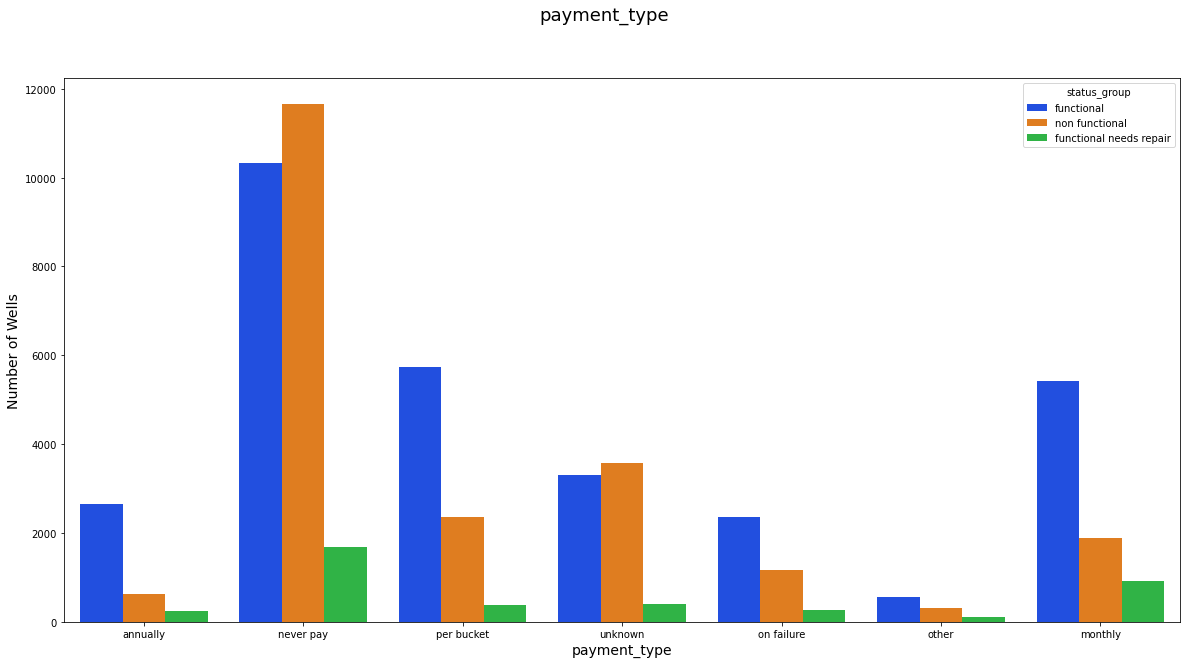

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='payment_type', hue="status_group", palette='bright', data=df)

fig.suptitle('payment_type', fontsize=18)
plt.xlabel("payment_type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

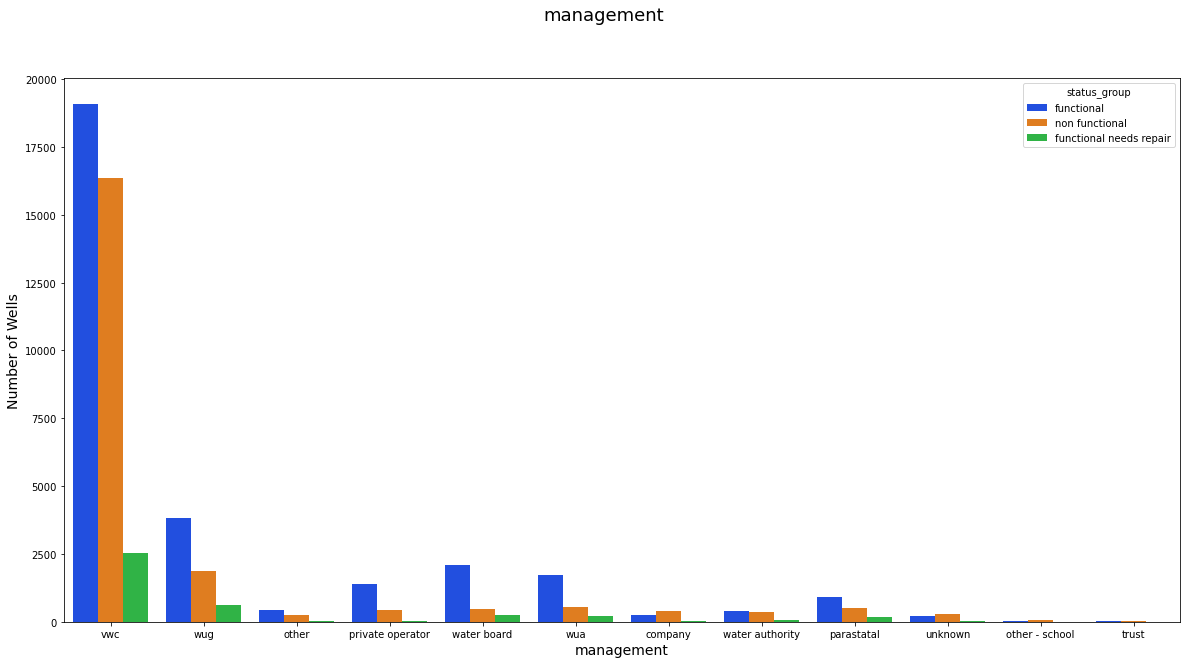

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='management', hue="status_group", palette='bright')

fig.suptitle('management', fontsize=18)
plt.xlabel("management", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

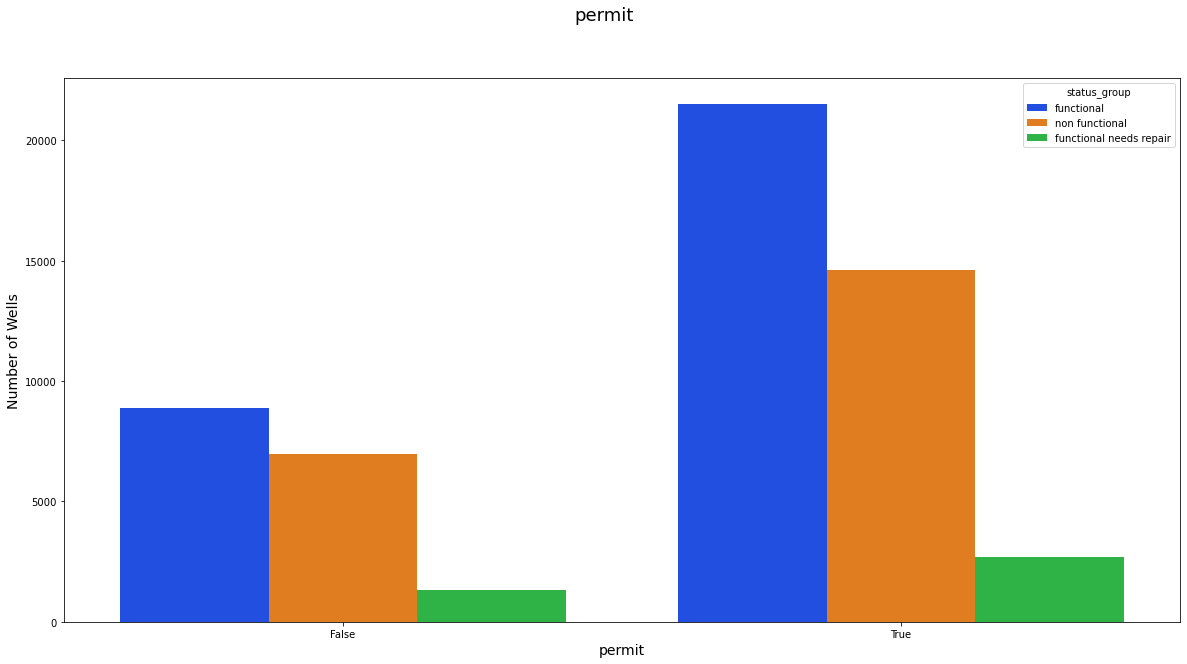

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='permit', hue="status_group", palette='bright')

fig.suptitle('permit', fontsize=18)
plt.xlabel("permit", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

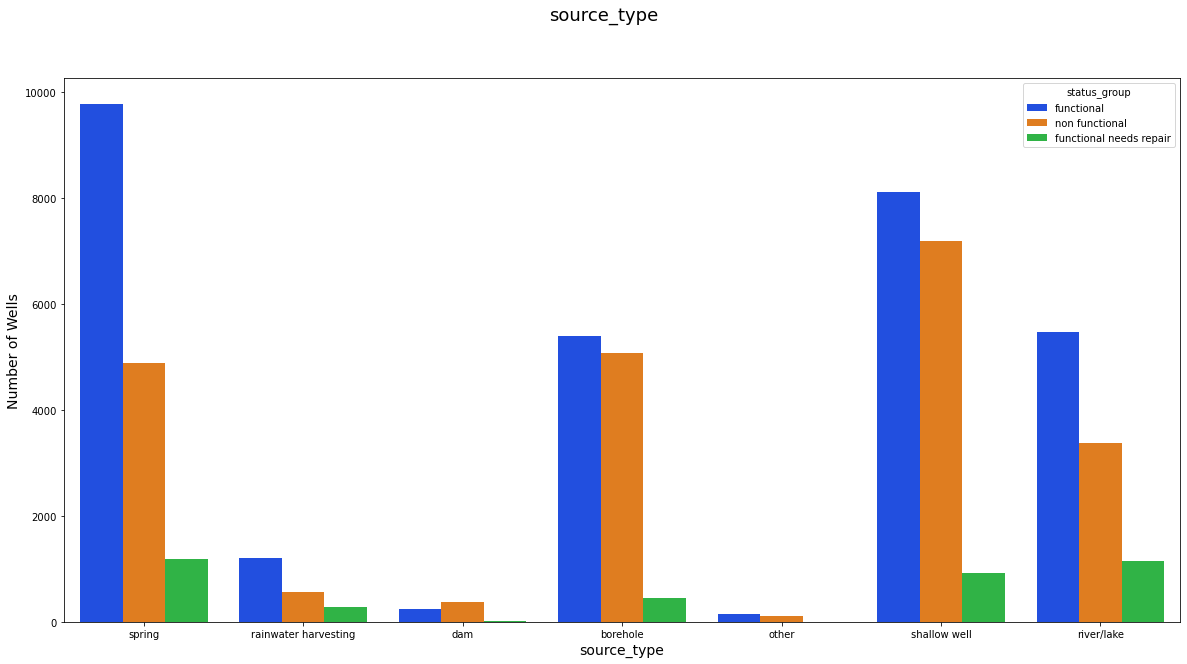

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='source_type', hue="status_group", palette='bright')

fig.suptitle('source_type', fontsize=18)
plt.xlabel("source_type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

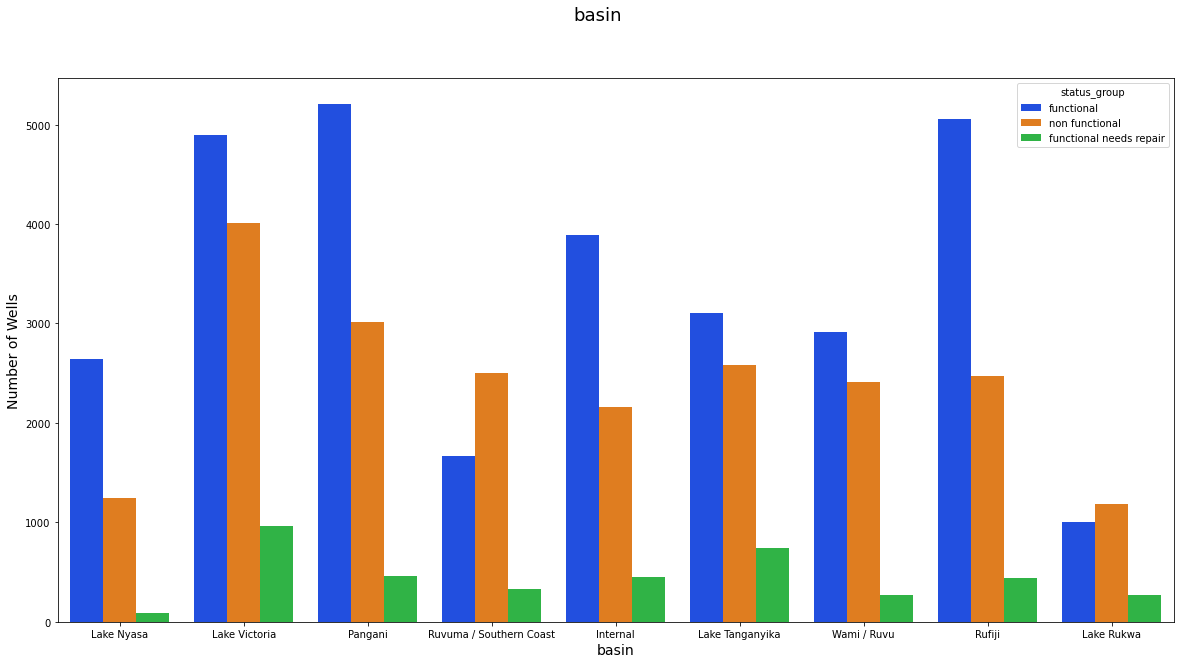

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df, x='basin', hue="status_group", palette='bright')

fig.suptitle('basin', fontsize=18)
plt.xlabel("basin", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()